## Open a big dataset of 17 GB

This dataset contains information on flights within the United States between 1988 and 2018. It can be downloaded from: https://vaex.s3.us-east-2.amazonaws.com/airline/us_airline_data_1988_2018.hdf5

Each row in the dataset is an individual flight, and contains information on the airline (UniqueCarrier), airports (origin airport, destination airport) and flight level information such as time schedule (day of week, day of month, month, year), flight distance, departure time and delay, arrival time and delay, if the flight wasetc.

**Goal of this study: Predict the arrival delay of a flight => Regression Problem**

In [1]:
!pip install vaex

     |████████████████████████████████| 3.3 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 108 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 43 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 25.6 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 829 kB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 11.7 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 845 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 260 kB

In [2]:
import blake3
print(blake3.__version__) # The installed version is most likely going to be 0.3.1

# As stated in https://github.com/vaexio/vaex/issues/1817
# For some versions of Python, there is a compatibility error with Vaex and blake3==0.3.1 in operations
# where multithreading is used (e.g. the group-by operation)

# Therefore as a solution, we are downgrading blake3 from 0.3.1 to 0.2.1
!pip uninstall blake3 -y
!pip install blake3==0.2.1

# Warning: Requires a Jupyter Server Restart after this

0.3.1
Found existing installation: blake3 0.3.1
Uninstalling blake3-0.3.1:
  Successfully uninstalled blake3-0.3.1
  Using cached blake3-0.2.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (984 kB)


In [2]:
# Important: Assure/confirm that the installed version of blake3 is now 0.2.1
import blake3
print(blake3.__version__)

0.2.1


In [3]:
import vaex
import vaex.ml
import seaborn as sns
# set figure size
sns.set(rc = {'figure.figsize':(15,5)})
import matplotlib.pyplot as plt

df = vaex.open('us_airline_data_1988_2018.hdf5')

print(f'number of rows: {df.shape[0]:,}')
print(f'number of columns: {df.shape[1]}')
df.head(5)

number of rows: 183,821,926
number of columns: 29


#,Year,Month,DayOfMonth,DayOfWeek,UniqueCarrier,TailNum,FlightNum,Origin,Dest,CRSDepTime,DepTime,DepDelay,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelay,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1988,1,8,5,PI,--,930,BGM,ITH,1525,1532,7,--,--,1545,1555,10,0,--,0,20,23,--,32,--,--,--,--,--
1,1988,1,9,6,PI,--,930,BGM,ITH,1525,1522,-3,--,--,1545,1535,-10,0,--,0,20,13,--,32,--,--,--,--,--
2,1988,1,10,7,PI,--,930,BGM,ITH,1525,1522,-3,--,--,1545,1534,-11,0,--,0,20,12,--,32,--,--,--,--,--
3,1988,1,11,1,PI,--,930,BGM,ITH,1525,--,--,--,--,1545,--,--,1,--,0,20,--,--,32,--,--,--,--,--
4,1988,1,12,2,PI,--,930,BGM,ITH,1525,1524,-1,--,--,1545,1540,-5,0,--,0,20,16,--,32,--,--,--,--,--


In [4]:
# Print some basic statistics for all columns
df.describe()

,Year,Month,DayOfMonth,DayOfWeek,UniqueCarrier,TailNum,FlightNum,Origin,Dest,CRSDepTime,...,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
data_type,int16,int8,int16,int8,string,string,int16,string,string,int16,...,int8,int16,int16,int16,int16,int16,int16,int16,int16,int16
count,183821926,183821926,183821926,183821926,183821926,147156816,183821926,183821926,183821926,183821925,...,183821926,183795899,180136665,144694075,183821926,19923595,19923595,19923595,19923595,19923595
NA,0,0,0,0,0,36665110,0,0,0,1,...,0,26027,3685261,39127851,0,163898331,163898331,163898331,163898331,163898331
mean,2003.6859476273794,6.513381216558464,15.728390529430097,3.9381597057143227,--,--,1684.4972291118308,--,--,1332.076048920715,...,0.0023179171781716615,126.51852634644476,124.53201087074639,105.60806368885527,730.8989127553805,16.530673053733526,2.874630406811622,15.328259533482788,0.09065989345798287,21.535320106637382
std,8.73569,3.421192,8.784317,1.990106,--,--,1644.949138,--,--,475.780933,...,0.048089,70.2509,70.261681,68.463138,567.437383,44.242493,19.793786,29.854374,2.395068,40.43839
min,1988,1,1,1,--,--,0,--,--,0,...,0,-162,-719,-2378,0,0,0,-60,0,0
max,2018,12,31,7,--,--,9912,--,--,2400,...,1,1865,1440,1399,4983,2580,2692,1848,987,2454


## Exploratory Data Analysis

In [5]:
# Print the number of unique carriers, origins and destinations
numCarrier = df.UniqueCarrier.nunique()
numOrigin = df.Origin.nunique()
numDest = df.Dest.nunique()
print('Unique carriers:', numCarrier, ', Unique origins:', numOrigin, ', Unique destinations:', numDest)

Unique carriers: 33 , Unique origins: 411 , Unique destinations: 413


In [6]:
# Print the total number of flights
numFlights = df.shape[0]
print("Total number of flights:", numFlights)

Total number of flights: 183821926


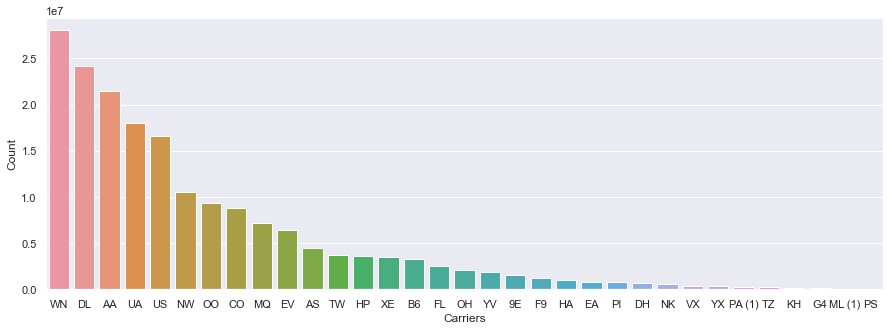

In [7]:
# Plot a seaborn bar plot illustrating the number of flights per carrier
carriers =  df.UniqueCarrier.value_counts()
ax = sns.barplot(x=carriers.index, y=carriers.values)
ax.set(xlabel='Carriers', ylabel='Count')
plt.show()

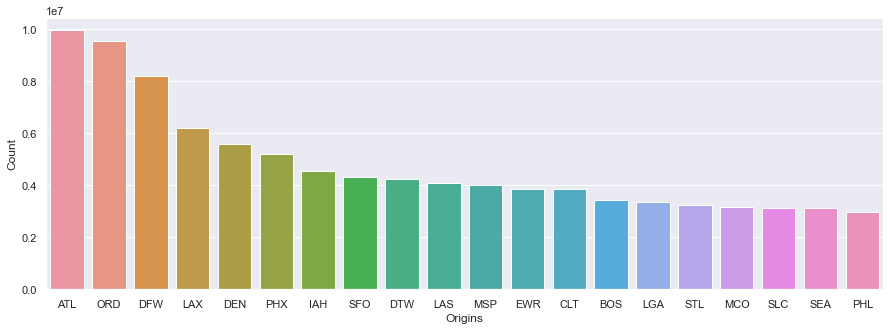

In [8]:
# Plot a seaborn bar plot illustrating the number of flights per origin location (show only top 20 origins)
origins = df.Origin.value_counts()[0:20]
ax = sns.barplot(x=origins.index, y=origins.values)
ax.set(xlabel='Origins', ylabel='Count')
plt.show()

In [9]:
# Print the percentage of cancelled flights (noted with 1 in Cancelled column)
x1 = df[df.Cancelled == 1].count()
print('Percentage of cancelled flights:', x1/numFlights * 100,'%')

# Print the percentage of delayed flights (i.e. positive arrival delay) at destination
x2 = df[df.ArrDelay > 0].count()
print('Percentage of delayed flights:', x2/numFlights * 100,'%')

Percentage of cancelled flights: 1.7730137372187038 %
Percentage of delayed flights: 43.33472221371459 %


In [10]:
# Print the top 20 origins with the highest number of cancelled flights (use groupby / aggregation with selection, sort and print top 20 the results):
x3 = df.groupby(by='Origin').agg({'Cancelled_flights': vaex.agg.sum('Cancelled')}).sort(by='Cancelled_flights', ascending=False)[0:20]
x3

#,Origin,Cancelled_flights
0,ORD,277805
1,DFW,154715
2,ATL,150079
3,LGA,124430
4,EWR,117538
...,...,...
15,IAH,53665
16,JFK,51382
17,PHX,50286
18,IAD,46269


Text(0.5, 1.0, 'Number of cancelled flights per Origin')

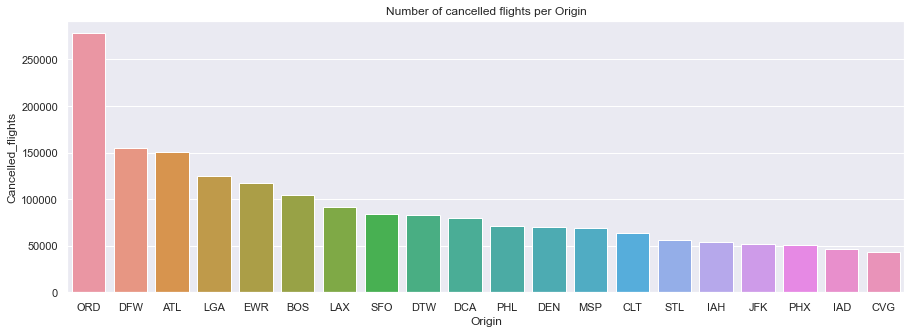

In [11]:
# Plot (seaborn bar plot) the Vaex DataFrame created in the previous step by converting it to Pandas DateFrame using .to_pandas_df()
sns.barplot(x='Origin', y='Cancelled_flights', data=x3.to_pandas_df()).set_title('Number of cancelled flights per Origin')

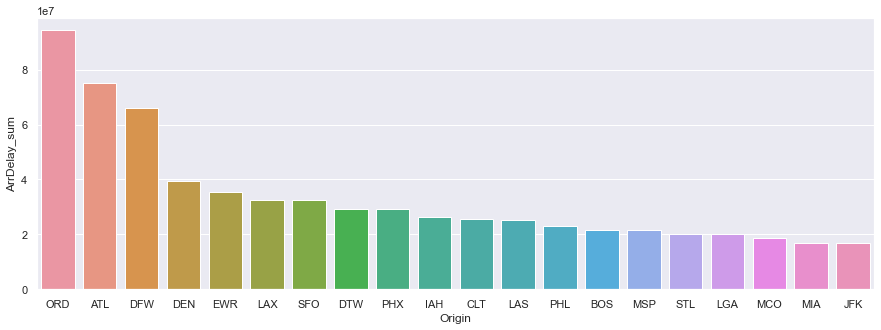

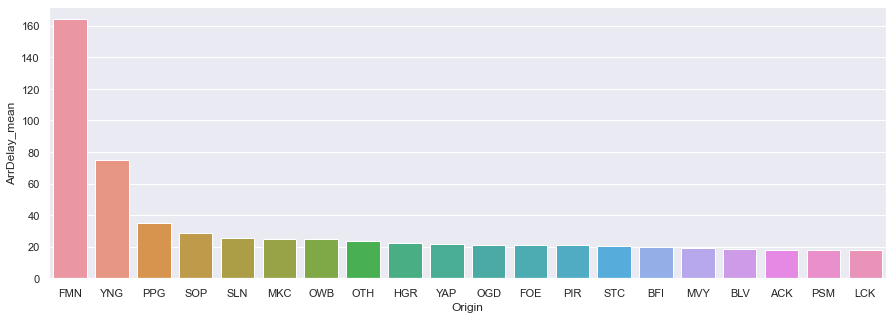

In [12]:
# Plot (seaborn bar plot) the top 20 origins with the highest the sum and the mean arrival delay
# The ArrDelay column has many Nan rows, so use dropna before plotting
df_na = df.dropna(['ArrDelay'])
x4 = df_na.groupby(by='Origin').agg({'ArrDelay_sum': vaex.agg.sum('ArrDelay'),
                                    'ArrDelay_mean': vaex.agg.mean('ArrDelay')})
x4.head(10)
# convert Vaex DataFrame to Pandas DataDrame 
sns.barplot(x='Origin', y='ArrDelay_sum', data=x4.sort(by='ArrDelay_sum', ascending=False).head(20).to_pandas_df())
plt.show()
sns.barplot(x='Origin', y='ArrDelay_mean', data=x4.sort(by='ArrDelay_mean', ascending=False).head(20).to_pandas_df())
plt.show()

<AxesSubplot:xlabel='Month', ylabel='Mean_arrival_delay'>

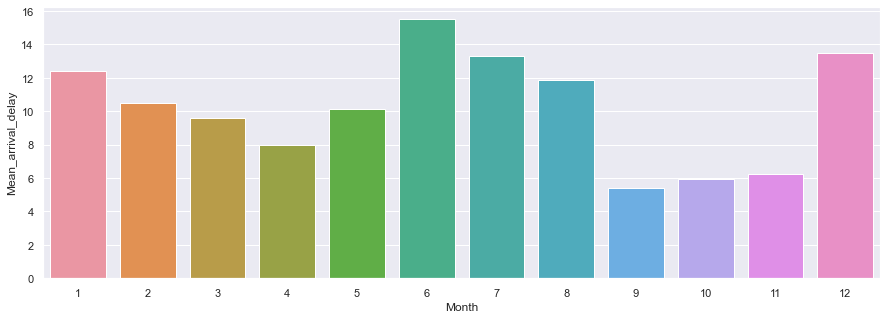

In [13]:
# Plot (seaborn bar plot) the mean arrival delay per month for the ORD Origin
# Firstly, create a Vaex DataFrame using groupby / aggregation with selection
# Use df_na DataFrame as above
x5 = df_na.groupby(by='Month').agg({'Mean_arrival_delay': vaex.agg.mean('ArrDelay', selection='Origin == "ORD"')})

# convert Vaex DataFrame to Pandas DataDrame 
sns.barplot(x='Month', y='Mean_arrival_delay', data=x5.to_pandas_df())

## Split into train and test datasets

Let’s split the DataFrame into train and test datasets. The test set will comprise 20% of the data. There are two methods to split the DataFrame:
* .train_test_split() methosd does not shuffle the data for us, since vaex cannot assume your data fits into memory, so you are responsible for either writing it in shuffled order on disk, or shuffle it in memory (df.shuffle().export("shuffled.hdf5"))
* .split_random() method returns a list containing random portions of the DataFrame -- Not recommended because it causes high disk usage during DaatFrame processing (see lab slides).

In [14]:
import vaex
import vaex.ml

df_train, df_test = df.ml.train_test_split()
print(f'number of rows (train): {df_train.shape[0]:,}')
print(f'number of rows (test): {df_test.shape[0]:,}')

number of rows (train): 147,057,541
number of rows (test): 36,764,385


/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/vaex/ml/__init__.py:31: UserWarning: Make sure the DataFrame is shuffled
  warnings.warn('Make sure the DataFrame is shuffled')


## Missing values handling

### Drop columns with high number of missing (NA) values

In [15]:
# The following columns have a large number of missing values
df_train.drop(['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], inplace=True)
# Tailnum and CancellationCode are both string columns with many None values. Cancelled flights have no impact on arrival delay. We can drop these columns as well
df_train.drop(['TailNum', 'CancellationCode', 'Cancelled'], inplace=True)

#,Year,Month,DayOfMonth,DayOfWeek,UniqueCarrier,FlightNum,Origin,Dest,CRSDepTime,DepTime,DepDelay,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelay,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance
0,1995,2,18,6,NW,186,SJC,MSP,805,803,-2,12,4,1338,1341,3,0,213,218,202,1576
1,1995,2,19,7,NW,186,SJC,MSP,805,811,6,65,5,1338,1429,51,0,213,258,188,1576
2,1995,2,20,1,NW,186,SJC,MSP,805,825,20,11,3,1338,1355,17,0,213,210,196,1576
3,1995,2,21,2,NW,186,SJC,MSP,805,804,-1,12,3,1338,1330,-8,0,213,206,191,1576
4,1995,2,22,3,NW,186,SJC,MSP,805,804,-1,15,4,1338,1354,16,0,213,230,211,1576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"147,057,536",2018,12,27,4,DL,864,JFK,SLC,935,929,-6,28,9,1311,1230,-41,0,336,301,264,1990
"147,057,537",2018,12,27,4,DL,865,MSP,SLC,1035,1030,-5,14,10,1240,1214,-26,0,185,164,140,991
"147,057,538",2018,12,27,4,DL,866,DEN,MSP,1054,1100,6,10,5,1353,1350,-3,0,119,110,95,680
"147,057,539",2018,12,27,4,DL,866,MSP,DEN,850,850,0,15,8,1010,951,-19,0,140,121,98,680


### Drop rows for columns with relatively low number of missing values

In [16]:
# CRSDepTime, DepTime, DepDelay, CRSArrTime, ArrTime, ArrDelay, CRSElapsedTime, ActualElapsedTime: very small number (~ < 1%) of rows with missing values => remove rows
df_train = df_train.dropna(['CRSDepTime', 'DepTime', 'DepDelay', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'CRSElapsedTime', 'ActualElapsedTime'])

### Value imputing for columns with relatively low number of missing values

In [17]:
# TaxiIn, TaxiOut - just do the mean of the whole dataset set for now
fill_taxiout = df.TaxiOut.mean()
df_train['TaxiOut'] = df_train.TaxiOut.fillna(value=fill_taxiout)
fill_taxin = df.TaxiIn.mean()
df_train['TaxiIn'] = df_train.TaxiIn.fillna(value=fill_taxin)

# AirTime: Large number of missing values. Initially, let's mark the missing values with -1
df_train['AirTime'] = df_train.AirTime.fillna(value=-1)

## Cyclical encoding on Month, DayOfMonth, DayOfWeek, CRSDepTime, DepTime, CRSArrTime, ArrTime

In [18]:
# Days of the week encoder
cycencod1 = vaex.ml.CycleTransformer(n=7, features='DayOfWeek') # n is the cycle size
df_train = cycencod1.fit_transform(df_train)
# Days of the month encoder
cycencod2 = vaex.ml.CycleTransformer(n=31, features='DayOfMonth') # n is the cycle size
df_train = cycencod2.fit_transform(df_train)
# Month encoder
cycencod3 = vaex.ml.CycleTransformer(n=12, features='Month') # n is the cycle size
df_train = cycencod3.fit_transform(df_train)
cycencod4 = vaex.ml.CycleTransformer(n=2400, features=['CRSDepTime', 'DepTime', 'CRSArrTime', 'ArrTime'])
df_train = cycencod4.fit_transform(df_train)

# drop unnecessary columns 
df_train.drop(['DayOfWeek', 'DayOfMonth', 'Month', 'Year', 'CRSDepTime', 'DepTime', 'CRSArrTime', 'ArrTime'], inplace=True)

print(f'number of rows: {df_train.shape[0]:,}')
print(f'number of columns: {df_train.shape[1]}')
df_train.head(5)

number of rows: 143,881,474
number of columns: 27


#,UniqueCarrier,FlightNum,Origin,Dest,DepDelay,TaxiOut,TaxiIn,ArrDelay,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DayOfWeek_x,DayOfWeek_y,DayOfMonth_x,DayOfMonth_y,Month_x,Month_y,CRSDepTime_x,CRSDepTime_y,DepTime_x,DepTime_y,CRSArrTime_x,CRSArrTime_y,ArrTime_x,ArrTime_y
0,NW,186,SJC,MSP,-2,12,4,3,0,213,218,202,1576,0.62349,-0.781831,-0.874347,-0.485302,0.5,0.866025,-0.511293,0.859406,-0.506786,0.862072,-0.935444,-0.353475,-0.932639,-0.360811
1,NW,186,SJC,MSP,6,65,5,51,0,213,258,188,1576,1,-2.44929e-16,-0.758758,-0.651372,0.5,0.866025,-0.511293,0.859406,-0.524729,0.851269,-0.935444,-0.353475,-0.825606,-0.564247
2,NW,186,SJC,MSP,20,11,3,17,0,213,210,196,1576,0.62349,0.781831,-0.612106,-0.790776,0.5,0.866025,-0.511293,0.859406,-0.55557,0.83147,-0.935444,-0.353475,-0.918791,-0.394744
3,NW,186,SJC,MSP,-1,12,3,-8,0,213,206,191,1576,-0.222521,0.974928,-0.440394,-0.897805,0.5,0.866025,-0.511293,0.859406,-0.509041,0.860742,-0.935444,-0.353475,-0.942641,-0.333807
4,NW,186,SJC,MSP,-1,15,4,16,0,213,230,211,1576,-0.900969,0.433884,-0.250653,-0.968077,0.5,0.866025,-0.511293,0.859406,-0.509041,0.860742,-0.935444,-0.353475,-0.919821,-0.392337


## Curse of Dimensionality

As seen during the EDA step, our dataset contains around 183 million flights for 33 different airlines amongst 411 airports. The columns UniqueCarries, Origin and Dest involve categorical data which cannot be processed by any machine learning algorithm. So they need to be encoded into numbers.  If we apply OneHotEncoding the number of columns in the dataset will increase by (33+411=) 444 new columns and the classification models are expected to require a high amount of computation power to be trained on.

In order to reduce dimensionality, the variable with the highest number of levels can be grouped into clusters. In our case, the origin and destination airport have the highest number of levels and can be grouped into clusters. But clustering will reduce resolution of the data and the model might not learn the nuances between different levels of the variable. As a result, the model will not perform as well as we would expect and will have a lower accuracy which is undesirable.

Instead of training the model on the whole dataset, what if we train a separate model for each origin airport? In this case we will apply one hot encoding only on the carrier column, thus having only 33 new columns. Therefore, for each origin airport, the number of rows reduces to about (max) 10 millions and the average number of columns reduces to a manageable ~50. This is a huge improvement over 183 Million Rows and ~ 450 Columns.

We choose to begin with the origin airport with the highest number of flights as shown in the EDA step which is Atlanta (ATL code)

#### Filter rows related to ATL airport

In [19]:
# keep only rows having Origin equals to ATL
df_train = df_train[df_train.Origin == 'ATL']

# Print the number of unique carriers departing from Atlanta airport
numCarrier = df_train.UniqueCarrier.nunique()
print('Unique carriers:', numCarrier)

# drop FlightNum, Origin and Dest columns
df_train.drop(['FlightNum', 'Origin', 'Dest'], inplace=True)
print(f'number of rows: {df_train.shape[0]:,}')
print(f'number of columns: {df_train.shape[1]}')

Unique carriers: 23
number of rows: 8,168,009
number of columns: 24


### Apply One Ηot Encoding on UniqueCarriers

In [20]:
one_hot_encoder = vaex.ml.OneHotEncoder(features=['UniqueCarrier'])
df_train = one_hot_encoder.fit_transform(df_train)

df_train.drop('UniqueCarrier', inplace=True)

#,DepDelay,TaxiOut,TaxiIn,ArrDelay,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DayOfWeek_x,DayOfWeek_y,DayOfMonth_x,DayOfMonth_y,Month_x,Month_y,CRSDepTime_x,CRSDepTime_y,DepTime_x,DepTime_y,CRSArrTime_x,CRSArrTime_y,ArrTime_x,ArrTime_y,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DH,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HP,UniqueCarrier_MQ,UniqueCarrier_NK,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_TW,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,UniqueCarrier_YX
0,27,21,3,25,0,91,89,65,425,-0.900968867902419,0.43388373911755823,0.9795299412524945,0.20129852008866006,0.5000000000000001,0.8660254037844386,-0.6613118653236523,-0.7501110696304591,-0.6066823510019994,-0.7949443533875103,-0.5983246005706593,-0.8012538126910606,-0.4539904997395469,-0.8910065241883678,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,25,20,4,25,0,91,91,67,425,-0.9009688679024191,-0.433883739117558,0.9189578116202306,0.39435585511331855,0.5000000000000001,0.8660254037844386,-0.6613118653236523,-0.7501110696304591,-0.61083633463277,-0.7917568896399971,-0.5983246005706593,-0.8012538126910606,-0.4539904997395469,-0.8910065241883678,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12,16,4,20,0,91,99,79,425,-0.2225209339563146,-0.9749279121818236,0.8207634412072763,0.5712682150947923,0.5000000000000001,0.8660254037844386,-0.6613118653236523,-0.7501110696304591,-0.6374239897486895,-0.7705132427757894,-0.5983246005706593,-0.8012538126910606,-0.46561452032511164,-0.8849876374630418,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14,24,3,22,0,91,99,72,425,0.6234898018587334,-0.7818314824680299,0.6889669190756866,0.7247927872291199,0.5000000000000001,0.8660254037844386,-0.6613118653236523,-0.7501110696304591,-0.6333808726275503,-0.7738402097265061,-0.5983246005706593,-0.8012538126910606,-0.4609743745354621,-0.8874134470592834,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10,15,4,10,0,91,91,72,425,1.0,-2.4492935982947064e-16,0.5289640103269624,0.8486442574947509,0.5000000000000001,0.8660254037844386,-0.6613118653236523,-0.7501110696304591,-0.6414496315691581,-0.7671651518152993,-0.5983246005706593,-0.8012538126910606,-0.4886212414969553,-0.872496007072797,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"8,168,004",0,15,11,2,0,112,114,88,545,-0.9009688679024191,-0.433883739117558,0.6889669190756865,-0.72479278722912,1.0,-2.4492935982947064e-16,-0.8837656300886935,0.4679298142605734,-0.8837656300886935,0.4679298142605734,-0.9998766324816606,-0.015707317311820464,-0.9997806834748455,-0.020942419883356867,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"8,168,005",0,10,4,-9,0,67,58,44,270,-0.9009688679024191,-0.433883739117558,0.6889669190756865,-0.72479278722912,1.0,-2.4492935982947064e-16,-0.7431448254773944,0.669130606358858,-0.7431448254773944,0.669130606358858,-0.8991762550080904,0.4375866341990185,-0.8886172326549487,0.45864955448431516,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"8,168,006",166,12,3,155,0,80,69,54,366,-0.9009688679024191,-0.433883739117558,0.6889669190756865,-0.72479278722912,1.0,-2.4492935982947064e-16,0.30901699437494723,-0.9510565162951536,0.8737722230354653,-0.4863353804234902,0.5877852522924729,-0.8090169943749476,0.9753423205085126,-0.2206974350215017,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"8,168,007",13,8,3,4,0,55,46,35,134,-0.9009688679024191,-0.433883739117558,0.6889669190756865,-0.72479278722912,1.0,-2.4492935982947064e-16,-0.8512693459228686,-0.5247289783231448,-0.8329212407100993,-0.5533915492433443,-0.8580649057236447,-0.5135412520581698,-0.8526401643540923,-0.5224985647159487,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
"""
# Standard scale numerical features
standard_scaler = vaex.ml.MinMaxScaler(features=['DepDelay', 'TaxiOut', 'TaxiIn', 'ArrDelay', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Distance'])
df_atl = standard_scaler.fit_transform(df_atl)
df_atl.drop(['DepDelay', 'TaxiOut', 'TaxiIn', 'ArrDelay', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Distance'], inplace=True)

print(f'number of rows: {df_atl.shape[0]:,}')
print(f'number of columns: {df_atl.shape[1]}')
df_atl.head(5)
"""

"\n# Standard scale numerical features\nstandard_scaler = vaex.ml.MinMaxScaler(features=['DepDelay', 'TaxiOut', 'TaxiIn', 'ArrDelay', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Distance'])\ndf_atl = standard_scaler.fit_transform(df_atl)\ndf_atl.drop(['DepDelay', 'TaxiOut', 'TaxiIn', 'ArrDelay', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Distance'], inplace=True)\n\nprint(f'number of rows: {df_atl.shape[0]:,}')\nprint(f'number of columns: {df_atl.shape[1]}')\ndf_atl.head(5)\n"

## Modeling Part I: IncrementalPredictor + Stochastic Gradient Descent

The vaex.ml.sklearn module provides convenient wrappers to the scikit-learn estimators. In fact, these wrappers can be used with any library that follows the API convention established by scikit-learn, i.e. implements the .fit and .transform methods. Here we will use the IncrementalPredictor wrapper which targets datasets that are too big to fit in memory.

In [21]:
%%time
from vaex.ml.sklearn import IncrementalPredictor
from sklearn.linear_model import SGDRegressor

# It is important to not include ArrDelay as a features since it will be used as the target bariable
# Either use this to select the feature columns
#features = df_atl.column_names
#features.remove('ArrDelay')

# Or select manualy the features
features = ['DepDelay', 'DayOfWeek_x', 'DayOfWeek_y', 'Month_x', 'Month_y']

# Instantiate the SGDRegressor model normally, using the scikit-learn API, with 'constant' learning rate , eta0 equal to 0.0001 and random state equal to 42
sgd_model = SGDRegressor(learning_rate='constant', eta0=0.0001, random_state=42)
vaex_sgd_model = IncrementalPredictor(features=features, 
                       target='ArrDelay', 
                       model=sgd_model, 
                       prediction_name='prediction')

# Train the model
vaex_sgd_model.fit(df_train)

# Get the prediction of the model on the training data
df_train = vaex_sgd_model.transform(df_train)

# Preview the resulting train dataframe that contains the predictions
df_train

CPU times: user 5.34 s, sys: 913 ms, total: 6.25 s
Wall time: 3.25 s


#,DepDelay,TaxiOut,TaxiIn,ArrDelay,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DayOfWeek_x,DayOfWeek_y,DayOfMonth_x,DayOfMonth_y,Month_x,Month_y,CRSDepTime_x,CRSDepTime_y,DepTime_x,DepTime_y,CRSArrTime_x,CRSArrTime_y,ArrTime_x,ArrTime_y,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DH,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HP,UniqueCarrier_MQ,UniqueCarrier_NK,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_TW,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,UniqueCarrier_YX,prediction
0,27,21,3,25,0,91,89,65,425,-0.900968867902419,0.43388373911755823,0.9795299412524945,0.20129852008866006,0.5000000000000001,0.8660254037844386,-0.6613118653236523,-0.7501110696304591,-0.6066823510019994,-0.7949443533875103,-0.5983246005706593,-0.8012538126910606,-0.4539904997395469,-0.8910065241883678,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.666057758967908
1,25,20,4,25,0,91,91,67,425,-0.9009688679024191,-0.433883739117558,0.9189578116202306,0.39435585511331855,0.5000000000000001,0.8660254037844386,-0.6613118653236523,-0.7501110696304591,-0.61083633463277,-0.7917568896399971,-0.5983246005706593,-0.8012538126910606,-0.4539904997395469,-0.8910065241883678,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.895976949747409
2,12,16,4,20,0,91,99,79,425,-0.2225209339563146,-0.9749279121818236,0.8207634412072763,0.5712682150947923,0.5000000000000001,0.8660254037844386,-0.6613118653236523,-0.7501110696304591,-0.6374239897486895,-0.7705132427757894,-0.5983246005706593,-0.8012538126910606,-0.46561452032511164,-0.8849876374630418,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.2750601335773357
3,14,24,3,22,0,91,99,72,425,0.6234898018587334,-0.7818314824680299,0.6889669190756866,0.7247927872291199,0.5000000000000001,0.8660254037844386,-0.6613118653236523,-0.7501110696304591,-0.6333808726275503,-0.7738402097265061,-0.5983246005706593,-0.8012538126910606,-0.4609743745354621,-0.8874134470592834,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.02292515682990448
4,10,15,4,10,0,91,91,72,425,1.0,-2.4492935982947064e-16,0.5289640103269624,0.8486442574947509,0.5000000000000001,0.8660254037844386,-0.6613118653236523,-0.7501110696304591,-0.6414496315691581,-0.7671651518152993,-0.5983246005706593,-0.8012538126910606,-0.4886212414969553,-0.872496007072797,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-4.122017189061833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"8,168,004",0,15,11,2,0,112,114,88,545,-0.9009688679024191,-0.433883739117558,0.6889669190756865,-0.72479278722912,1.0,-2.4492935982947064e-16,-0.8837656300886935,0.4679298142605734,-0.8837656300886935,0.4679298142605734,-0.9998766324816606,-0.015707317311820464,-0.9997806834748455,-0.020942419883356867,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-6.456448277998406
"8,168,005",0,10,4,-9,0,67,58,44,270,-0.9009688679024191,-0.433883739117558,0.6889669190756865,-0.72479278722912,1.0,-2.4492935982947064e-16,-0.7431448254773944,0.669130606358858,-0.7431448254773944,0.669130606358858,-0.8991762550080904,0.4375866341990185,-0.8886172326549487,0.45864955448431516,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-6.456448277998406
"8,168,006",166,12,3,155,0,80,69,54,366,-0.9009688679024191,-0.433883739117558,0.6889669190756865,-0.72479278722912,1.0,-2.4492935982947064e-16,0.30901699437494723,-0.9510565162951536,0.8737722230354653,-0.4863353804234902,0.5877852522924729,-0.8090169943749476,0.9753423205085126,-0.2206974350215017,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128.35616778511323
"8,168,007",13,8,3,4,0,55,46,35,134,-0.9009688679024191,-0.433883739117558,0.6889669190756865,-0.72479278722912,1.0,-2.4492935982947064e-16,-0.8512693459228686,-0.5247289783231448,-0.8329212407100993,-0.5533915492433443,-0.858

### Performance on the training dataset

In [22]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true=df_train.ArrDelay.values, y_pred=df_train.prediction.values)
print("The mean squared error (MSE) on train dataset: {:.4f}".format(mse))

The mean squared error (MSE) on train dataset: 331.4536


### Performance on the test dataset by applying train dataset state to test dataset

In [23]:
# Applying the same preprocessing transformation steps from train to test through a pipeline
state = df_train.state_get()
df_test.state_set(state)

mse = mean_squared_error(y_true=df_test.ArrDelay.values, y_pred=df_test.prediction.values)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 489.8932


## Modeling Part II: Gradient Boosting with XGBoost

In [24]:
%%time
import vaex.ml.xgboost

features = ['DepDelay', 'DayOfWeek_x', 'DayOfWeek_y', 'Month_x', 'Month_y']

params_xgboost = {
    'learning_rate': 0.1,
    'max_depth': 3,
    'objective': 'reg:squarederror',
    'subsample': 0.8,
    'random_state': 42,
    'n_jobs': -1}

# initialize XGBoostModel with num_boost_round equals to 100 (you need to initialize parameters: features, target, params)
xg_booster = vaex.ml.xgboost.XGBoostModel(features=features, target='ArrDelay', num_boost_round=100, params=params_xgboost)
xg_booster.fit(df_train)
df_train = xg_booster.transform(df_train)

/home/nick/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[13:32:20] WARNING: /workspace/src/gbm/gbtree.cc:139: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
CPU times: user 7min 10s, sys: 1.96 s, total: 7min 11s
Wall time: 6min 59s


### Performance on the training dataset

In [25]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true=df_train.ArrDelay.values, y_pred=df_train.xgboost_prediction.values)
print("The mean squared error (MSE) on train dataset: {:.4f}".format(mse))

The mean squared error (MSE) on train dataset: 269.1502


### Performance on the test dataset

In [26]:
df_test = xg_booster.transform(df_test)

mse = mean_squared_error(y_true=df_test.ArrDelay.values, y_pred=df_test.xgboost_prediction.values)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 168.8993
